In [208]:
%load_ext autoreload
%autoreload 2
from modelproject import Solow
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
model = Solow()

In [210]:
model.par.simT = 1000
discrete_optimum = model.find_opt_s(discrete=True)


In [211]:
continueous_solution = model.find_opt_s(discrete=False)
print(continueous_solution.sK, continueous_solution.sH)

/Users/carlsimpson/miniconda3/envs/numecon/lib/python3.9/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


0.3333333558138229 0.3333332845296211


# a shock to sh i steady state

In [215]:
model.par.A_init = 1
model.par.K_init = 1
model.par.L_init = 1
model.par.H_init = 1
baseline = model.find_steady_state(sK=0.12, sH=0.07, do_print=True)

baseline.steadystate_t

Steady state reached in period 374


374

Steady state reached in period 354


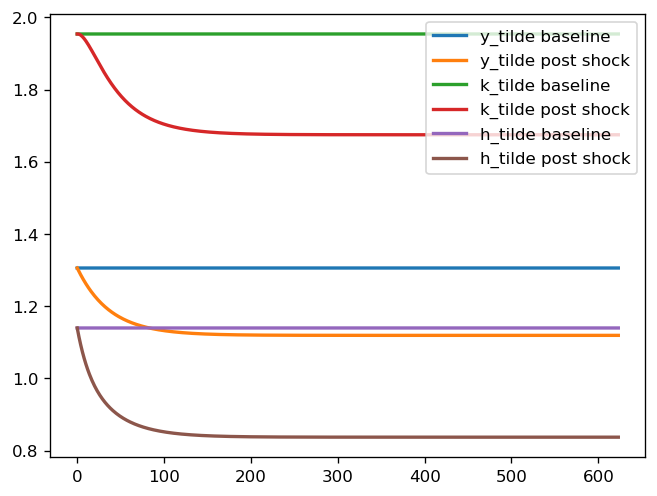

In [217]:
model.plotbaseline_vs_new_sh(new_sH=0.06)

In [231]:
model.plotbaseline_vs_new_sh_intactive()

interactive(children=(SelectionSlider(description='new_sH', options=(0.0, 0.05263157894736842, 0.1052631578947…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [192]:
model.par.A_init = baseline.A[374]
model.par.K_init = baseline.K[374]
model.par.L_init = baseline.L[374]
model.par.H_init = baseline.H[374]

post_shock = model.find_steady_state(sK=0.12, sH=0.05, do_print=True)

fig = plt.figure()

Steady state reached in period 378


<Figure size 640x480 with 0 Axes>

In [193]:
from types import SimpleNamespace

In [194]:

baseline_test = SimpleNamespace()
baseline_test.y_tilde = baseline.y_tilde[374:]
baseline_test.k_tilde = baseline.k_tilde[374:]
baseline_test.h_tilde = baseline.h_tilde[374:]

post_shock_periods_index = int(model.par.simT)- 2 - len(baseline_test.k_tilde)

post_shock.y_tilde  =  post_shock.y_tilde[:-post_shock_periods_index]
post_shock.k_tilde  =  post_shock.k_tilde[:-post_shock_periods_index]
post_shock.h_tilde  =  post_shock.h_tilde[:-post_shock_periods_index]

print(len(baseline_test.k_tilde), len(post_shock.h_tilde))


624 624


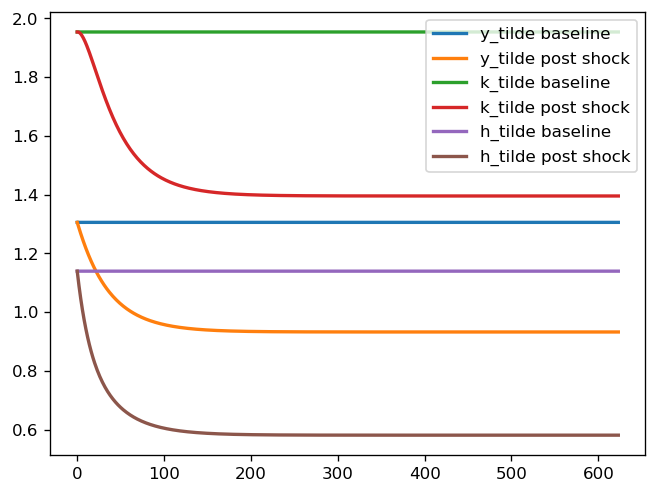

In [195]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120)

ax.plot(baseline_test.y_tilde, label='y_tilde baseline')
ax.plot(post_shock.y_tilde, label='y_tilde post shock')

ax.plot(baseline_test.k_tilde, label='k_tilde baseline')
ax.plot(post_shock.k_tilde, label='k_tilde post shock')

ax.plot(baseline_test.h_tilde, label = 'h_tilde baseline')
ax.plot(post_shock.h_tilde, label = 'h_tilde post shock')

ax.legend(loc='upper right')



In [201]:
model.plotbaseline_vs_new_sh(new_sH=0.65)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/carlsimpson/miniconda3/envs/numecon/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/vd/dwydg2bx2gz3j9x78jm_tx400000gn/T/ipykernel_16515/1635695189.py", line 1, in <cell line: 1>
    model.plotbaseline_vs_new_sh(new_sH=0.65)
  File "/Users/carlsimpson/Documents/6. semester polit/Intro Prog/projects-2023-scb/modelproject/modelproject.py", line 203, in plotbaseline_vs_new_sh
    ss_t = baseline_result.steadystate_t
AttributeError: 'types.SimpleNamespace' object has no attribute 'steadystate_t'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/carlsimpson/miniconda3/envs/numecon/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/carlsimpson/miniconda3/envs/

### Reformkommissionen Nye Reformveje 1's effects in the solow model with human capital
On april 6th 2022 Reformkommissionen recommended shortening the length of roughly half of the mastser's degrees in Denmark in the report [Nye Reformveje 1](reformkommissionen) . The suggestions from Reformkommisionen's suggestion has sparked a severe debate e.g in [Jyllandsposten](https://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdfhttps://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdf) or [Politiken](https://politiken.dk/debat/debatindlaeg/art9148200/Er-kortere-uddannelse-virkelig-en-katastrofe). 


One way of interpreting Reformkommisionen's suggestion, is as a reduction in the savings rate of human capital. Thus we believe that the Solow model with human capital is a highly relevant framework to aanlyze the predictions of Reformkomissionen's suggestion.

In [94]:
model.par.simT

1000

### Analytical derivation and description of the Solow model

### Simulation of the solow model and numerical solution for the optimal savings rate

### A shock to the savings rate of human capital